In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_excel('Final_Train.xlsx')
df.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [4]:
df.shape

(5961, 7)

In [5]:
df['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
92%      66
90%      66
91%      60
89%      42
88%      41
85%      27
82%      23
83%      21
86%      21
80%      19
77%      16
87%      14
79%      13
84%      13
81%      12
67%      12
76%       9
71%       9
75%       8
73%       8
74%       7
60%       7
78%       6
56%       5
68%       5
69%       4
70%       4
72%       3
57%       3
62%       2
64%       2
63%       2
55%       2
33%       2
58%       1
40%       1
7%        1
45%       1
65%       1
48%       1
36%       1
47%       1
53%       1
Name: Rating, dtype: int64

In [6]:
df['Miscellaneous_Info'].value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
100% 11 Feedback Coimbatore Ukkadam, Coimbatore                                          1
96% 9 Feedback Madipakkam, Chennai                                                       1
100% 4 Feedback Ramamurthy Nagar, Bangalore                                              1
81% 9 Feedback Vileparle West, Mumbai                                                    1
Dental Fillings Teeth Whitening Acrylic Partial Denture                                  1

In [7]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [9]:
round(df.isnull().sum()/len(df)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [10]:
# Extract years of experience
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [11]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [12]:
# Extract cities
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [13]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [14]:
# Seperate Ratings into bins
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [18]:
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [20]:
# Extract relevant qualification
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [21]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("Qualification",axis=1,inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [22]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [23]:
df['Profile'].value_counts().sort_index()

Ayurveda             786
Dentist             1397
Dermatologists      1034
ENT Specialist       728
General Medicine    1173
Homeopath            843
Name: Profile, dtype: int64

In [24]:
df['City'].value_counts().sort_index()

 Bangalore             1258
 Chennai                855
 Coimbatore             228
 Delhi                 1185
 Ernakulam              153
 Hyderabad              951
 Mumbai                1219
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [25]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df['City'].value_counts().sort_index()

 Bangalore             1258
 Chennai                855
 Coimbatore             228
 Delhi                 1185
 Ernakulam              153
 Hyderabad              951
 Mumbai                1219
 Thiruvananthapuram      86
Unknown                  26
Name: City, dtype: int64

In [27]:
# Get dummies
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [28]:
df.head()

,Experience,Rating,Place,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,NaN,300,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

In [30]:
df.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 29 columns):
Experience                              5961 non-null int32
Rating                                  5961 non-null category
Place                                   5961 non-null object
Fees                                    5961 non-null int64
MBBS                                    5961 non-null int64
BDS                                     5961 non-null int64
BAMS                                    5961 non-null int64
BHMS                                    5961 non-null int64
MD - Dermatology                        5961 non-null int64
MS - ENT                                5961 non-null int64
Venereology & Leprosy                   5961 non-null int64
MD - General Medicine                   5961 non-null int64
Diploma in Otorhinolaryngology (DLO)    5961 non-null int64
MD - Homeopathy                         5961 non-null int64
City_ Bangalore                         5961 non-

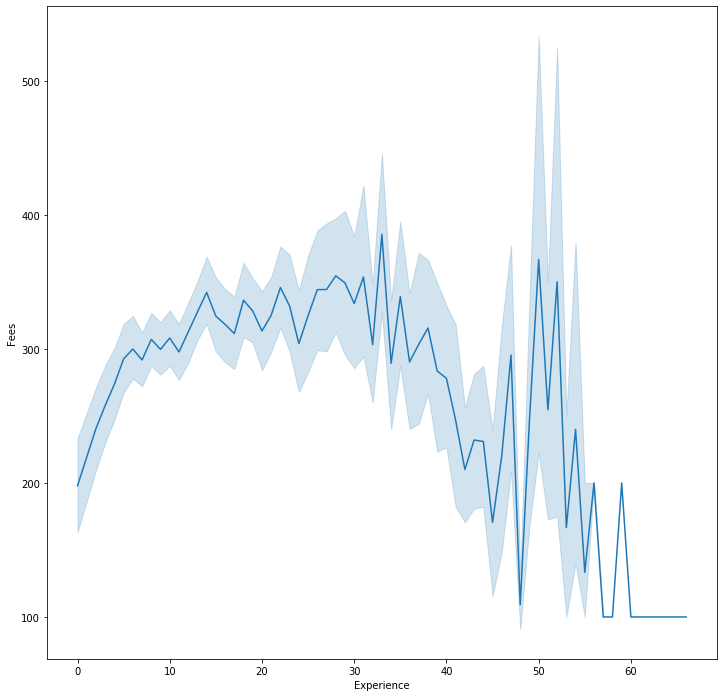

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
sns.lineplot(x = 'Experience', y = 'Fees', data = df)

In [38]:
X = df.drop("Fees",axis=1)
y = df["Fees"]

In [40]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [44]:
X

array([[ 23.,   8., 296., ...,   0.,   0.,   1.],
       [ 11.,   8., 856., ...,   0.,   0.,   0.],
       [  8.,   0., 452., ...,   1.,   0.,   0.],
       ...,
       [ 40.,   8., 215., ...,   0.,   1.,   0.],
       [ 14.,   7., 841., ...,   0.,   1.,   0.],
       [ 16.,   8., 597., ...,   0.,   0.,   0.]])

In [45]:
df_x = df.drop("Fees",axis=1)

In [46]:
df_x

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,10,Basavanagudi,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5957,33,0,Nungambakkam,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5958,41,10,Greater Kailash Part 2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5959,15,9,Vileparle West,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [48]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
le=LabelEncoder()
df['Place']=le.fit_transform(df['Place'])
df.head()
#sacaling down using standardscaler
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#x=sc.fit_transform(df_x)
#x=pd.DataFrame(x,columns=df_x.columns)

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,856,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 29 columns):
Experience                              5961 non-null int32
Rating                                  5961 non-null category
Place                                   5961 non-null int32
Fees                                    5961 non-null int64
MBBS                                    5961 non-null int64
BDS                                     5961 non-null int64
BAMS                                    5961 non-null int64
BHMS                                    5961 non-null int64
MD - Dermatology                        5961 non-null int64
MS - ENT                                5961 non-null int64
Venereology & Leprosy                   5961 non-null int64
MD - General Medicine                   5961 non-null int64
Diploma in Otorhinolaryngology (DLO)    5961 non-null int64
MD - Homeopathy                         5961 non-null int64
City_ Bangalore                         5961 non-n

In [54]:
# to change use .astype() 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 29 columns):
Experience                              5961 non-null int32
Rating                                  5961 non-null int64
Place                                   5961 non-null int32
Fees                                    5961 non-null int64
MBBS                                    5961 non-null int64
BDS                                     5961 non-null int64
BAMS                                    5961 non-null int64
BHMS                                    5961 non-null int64
MD - Dermatology                        5961 non-null int64
MS - ENT                                5961 non-null int64
Venereology & Leprosy                   5961 non-null int64
MD - General Medicine                   5961 non-null int64
Diploma in Otorhinolaryngology (DLO)    5961 non-null int64
MD - Homeopathy                         5961 non-null int64
City_ Bangalore                         5961 non-null

In [55]:
df.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,856,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
df_x1 = df.drop("Fees",axis=1)

In [58]:
df_x1.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,856,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
#sacaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x1)
x=pd.DataFrame(x,columns=df_x1.columns)

In [61]:
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.600979,1.162706,-0.455031,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,-0.494962,2.463975
1,-0.476040,1.162706,1.730781,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
2,-0.745295,-0.892962,0.153874,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
3,-0.476040,-0.892962,-1.344969,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
4,0.241972,1.162706,-0.302805,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848


In [62]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def maxr2_score(regr,x,y):
    max_r_score=-10
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr=linear_model.LinearRegression()
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ", final_r_state,"is",max_r_score)
    return final_r_state

In [65]:
from sklearn.linear_model import LinearRegression
lrreg=LinearRegression()
r_state=maxr2_score(lrreg,x,y)

r2_score corresponding to random state:  42 is:  0.1785918270743324
r2_score corresponding to random state:  43 is:  0.19546942439163673
r2_score corresponding to random state:  44 is:  0.2244570230910672
r2_score corresponding to random state:  45 is:  0.16884699330586928
r2_score corresponding to random state:  46 is:  0.16863614975749985
r2_score corresponding to random state:  47 is:  0.17030804135740596
r2_score corresponding to random state:  48 is:  0.1927186259510314
r2_score corresponding to random state:  49 is:  0.19178601373313697
r2_score corresponding to random state:  50 is:  0.17718111040145246
r2_score corresponding to random state:  51 is:  0.19156262599247798
r2_score corresponding to random state:  52 is:  0.12833099377148727
r2_score corresponding to random state:  53 is:  0.17503784089458851
r2_score corresponding to random state:  54 is:  0.1786338490912991
r2_score corresponding to random state:  55 is:  0.15696887531619885
r2_score corresponding to random state

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 27}

In [67]:
#knn max r2 score
knr=KNeighborsRegressor(n_neighbors=27)
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state:  42 is:  0.1785918270743324
r2_score corresponding to random state:  43 is:  0.19546942439163673
r2_score corresponding to random state:  44 is:  0.2244570230910672
r2_score corresponding to random state:  45 is:  0.16884699330586928
r2_score corresponding to random state:  46 is:  0.16863614975749985
r2_score corresponding to random state:  47 is:  0.17030804135740596
r2_score corresponding to random state:  48 is:  0.1927186259510314
r2_score corresponding to random state:  49 is:  0.19178601373313697
r2_score corresponding to random state:  50 is:  0.17718111040145246
r2_score corresponding to random state:  51 is:  0.19156262599247798
r2_score corresponding to random state:  52 is:  0.12833099377148727
r2_score corresponding to random state:  53 is:  0.17503784089458851
r2_score corresponding to random state:  54 is:  0.1786338490912991
r2_score corresponding to random state:  55 is:  0.15696887531619885
r2_score corresponding to random state

In [68]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lrreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lrreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
# based on output KNN Regression is Performing well

Mean r2 score for Linear Regression: 0.16505367572822177
standard deviation in r2 score for Linear Regression: 0.032228988453918854

Mean r2 score for KNN Regression:  0.17443967425557552
standard deviation in r2 score for KNN Regression: 0.014077255897993753


In [69]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [70]:
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state:  42 is:  0.1785918270743324
r2_score corresponding to random state:  43 is:  0.19546942439163673
r2_score corresponding to random state:  44 is:  0.2244570230910672
r2_score corresponding to random state:  45 is:  0.16884699330586928
r2_score corresponding to random state:  46 is:  0.16863614975749985
r2_score corresponding to random state:  47 is:  0.17030804135740596
r2_score corresponding to random state:  48 is:  0.1927186259510314
r2_score corresponding to random state:  49 is:  0.19178601373313697
r2_score corresponding to random state:  50 is:  0.17718111040145246
r2_score corresponding to random state:  51 is:  0.19156262599247798
r2_score corresponding to random state:  52 is:  0.12833099377148727
r2_score corresponding to random state:  53 is:  0.17503784089458851
r2_score corresponding to random state:  54 is:  0.1786338490912991
r2_score corresponding to random state:  55 is:  0.15696887531619885
r2_score corresponding to random state

In [71]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.17588756969955907
standard deviation in r2 score for Lasso Regression: 0.01369879241442744


In [72]:
# gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [73]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Gradientboosting Regressor:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for GradientbootingRegressir:",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Gradientboosting Regressor: 0.2070032709819416
standard deviation in r2 score for GradientbootingRegressir: 0.01359653220616833


In [76]:
X = df.drop("Fees",axis=1)
Y = df["Fees"]

In [77]:
# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [79]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [80]:
# support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(X_train),Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [3]:
def score(Y_pred,Y):
    Y_pred = np.log(Y_pred)
    Y = np.log(Y)
    return 1 - ((np.sum((Y_pred-Y)**2))/len(Y))**1/2
# Prediction
Y_pred = m.predict(scaler.transform(X_test))
score(Y_pred,Y_test)

NameError: name 'm' is not defined